### Fashion MNIST experiment 

In [35]:
import numpy as np

from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout

import matplotlib.pyplot as plt

from utils import mnist_reader

%matplotlib inline

#### 1), load data 

In [36]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [37]:
X_train = (X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)
X_test = (X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)

In [41]:
def id_to_onehot(y, size):
    onehot = np.zeros(shape=(y.shape[0], size))
    for i in range(0, y.shape[0]):
        onehot[i][y[i]] = 1
    return onehot

def show_img(img, zoom=4, dpi=80):
    w = img.shape[0]
    h = img.shape[1]
    plt.figure(figsize=(w*zoom/dpi, h*zoom/dpi), dpi=dpi)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    return

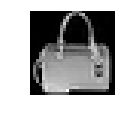

In [45]:
show_img(X_train[234].reshape(28, 28))

In [5]:
y_train = id_to_onehot(y_train, 10)
y_test = id_to_onehot(y_test, 10)

#### 2), build model 

In [27]:
m = Sequential()

m.add(Flatten(input_shape=(28, 28, 1)))
m.add(Dense(800))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(Dense(10))
m.add(BatchNormalization())
m.add(Activation('softmax'))

m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 800)               3200      
_________________________________________________________________
activation_7 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total para

In [28]:
m.compile(optimizer='Adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

m.fit(X_train,
      y_train,
      validation_data=(X_test, y_test),
      batch_size=32,
      epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s - loss: 0.6269 - acc: 0.8200 - val_loss: 0.4659 - val_acc: 0.8452
Epoch 2/10
60000/60000 [==============================] - 25s - loss: 0.4476 - acc: 0.8545 - val_loss: 0.3759 - val_acc: 0.8780
Epoch 3/10
60000/60000 [==============================] - 24s - loss: 0.3841 - acc: 0.8697 - val_loss: 0.3828 - val_acc: 0.8641
Epoch 4/10
60000/60000 [==============================] - 25s - loss: 0.3445 - acc: 0.8805 - val_loss: 0.3434 - val_acc: 0.8809
Epoch 5/10
60000/60000 [==============================] - 24s - loss: 0.3173 - acc: 0.8906 - val_loss: 0.3086 - val_acc: 0.8896
Epoch 6/10
60000/60000 [==============================] - 24s - loss: 0.2938 - acc: 0.8971 - val_loss: 0.3512 - val_acc: 0.8785
Epoch 7/10
60000/60000 [==============================] - 24s - loss: 0.2761 - acc: 0.9032 - val_loss: 0.3117 - val_acc: 0.8926
Epoch 8/10
60000/60000 [==============================

In [31]:
evaluation_test = m.evaluate(X_train, y_train, verbose=0)

In [34]:
print('loss: {0}, accuracy: {1}'.format(evaluation_test[0], evaluation_test[1]))

loss: 0.2062406129896641, accuracy: 0.9278666666666666
